In [1]:
import torch as t
import matplotlib.pyplot as plt
import wandb

In [2]:
range_mod = 10
freq = t.rand(1) + 1


In [3]:
simple_dense = t.nn.Sequential(
    t.nn.Linear(1, 256),
    t.nn.GELU(),
    t.nn.Linear(256, 256),
    t.nn.GELU(),
    t.nn.Linear(256, 256),
    t.nn.GELU(),
    t.nn.Linear(256, 1)
)

optimizer = t.optim.SGD(simple_dense.parameters(), lr=0.01)
loss_fn = t.nn.MSELoss()


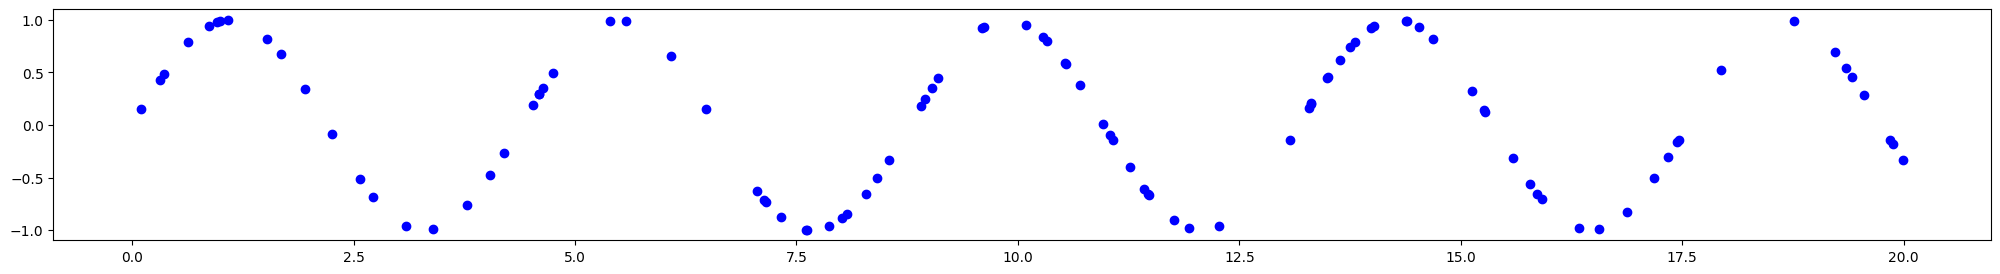

In [4]:
x_all = t.rand(100, 1) * range_mod * 2
y_all = t.sin(freq * x_all)


plt.figure(figsize=(25,3))
plt.plot(t.squeeze(x_all).numpy(), t.squeeze(y_all).numpy(), 'bo')
plt.show()

In [5]:
batch_size = 2048
steps = 10000

In [6]:
wandb.init(project="period piece")
wandb.watch(simple_dense)

for i in range(steps):
    x_train = t.rand(batch_size, 1) * range_mod
    y_train = t.sin(freq * x_train)

    optimizer.zero_grad()
    y_pred = simple_dense(x_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        with t.no_grad():
            p_all = simple_dense(x_all)
            test_loss = loss_fn(p_all, y_all)

            wandb.log({'train loss': loss.item(), 'test loss': test_loss.item(), 'batch': i})

            if i % 1000 == 0:
                print(i)
                x_points = t.squeeze(x_all).numpy()
                y_points = t.squeeze(p_all).numpy()
                data = [[x_points, y_points]]
                table = wandb.Table(data=data, columns = ["x", "y"])
                wandb.log({"curve": wandb.plot.line(table, "x", "y", title="Curve")})

wandb.finish()




Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: calculating. Use `wandb login --relogin` to force relogin


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


batch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test loss,▁▁▁▁▁▁▁▂▂▂▂▂▄▃▄▅▅▅▆▆▆▆▆▇▇▇▇███▇█████████
train loss,█▇▇▇▇▆▆▆▅▅▅▄▃▃▃▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch,9990
test loss,8.10231
train loss,0.00384
